In [2]:
set.seed(1)
rm(list = ls())

In [4]:
install.packages("Hmisc")

also installing the dependencies 'jpeg', 'latticeExtra', 'gridExtra', 'htmlTable', 'viridis'




package 'jpeg' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Pelusa\AppData\Local\Temp\RtmpM57VZH\downloaded_packages


In [5]:
library(grf)
if(packageVersion("grf") < '0.10.2') {
  warning("This script requires grf 0.10.2 or higher")
}
library(sandwich)
library(lmtest)
library(Hmisc)
library(ggplot2)


Warning message:
"package 'Hmisc' was built under R version 4.1.3"
Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.1.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units




In [88]:
data.all = read.csv("https://raw.githubusercontent.com/grf-labs/grf/master/experiments/acic18/synthetic_data.csv")
data.all$schoolid = factor(data.all$schoolid)

In [81]:
data.all

schoolid,Z,Y,S3,C1,C2,C3,XC,X1,X2,X3,X4,X5
<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76,1,0.081601672,6,4,2,1,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.385868955,4,12,2,1,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.398183726,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.175036855,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.884583369,6,4,1,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,-0.090564771,6,4,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,1.024043152,6,4,1,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,0.516234241,6,4,1,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567
76,1,1.425760714,6,5,2,0,4,0.3345435,0.6485856,-1.310927,0.2240765,-0.4267567


In [89]:
DF = data.all[,-1]
school.id = as.numeric(data.all$schoolid)
school.mat = model.matrix(~ schoolid + 0, data = data.all)
school.size = colSums(school.mat)

In [86]:
school.size

schoolid1  schoolid2  schoolid3  schoolid4  schoolid5  schoolid6  schoolid7 
        72        321        201        292        189        141        120 
 schoolid8  schoolid9 schoolid10 schoolid11 schoolid12 schoolid13 schoolid14 
       152        154        192         21         22         46         24 
schoolid15 schoolid16 schoolid17 schoolid18 schoolid19 schoolid20 schoolid21 
       106        226        128        178        108        161        187 
schoolid22 schoolid23 schoolid24 schoolid25 schoolid26 schoolid27 schoolid28 
        42         78        107        341        224        143        230 
schoolid29 schoolid30 schoolid31 schoolid32 schoolid33 schoolid34 schoolid35 
       107        117         14         47         50        172         54 
schoolid36 schoolid37 schoolid38 schoolid39 schoolid40 schoolid41 schoolid42 
        55        109         55         78         63         76         74 
schoolid43 schoolid44 schoolid45 schoolid46 schoolid47 schoolid48 schoolid49 
        46         60        113        141        325         88         92 
schoolid50 schoolid51 schoolid52 schoolid53 schoolid54 schoolid55 schoolid56 
        45         29         47         35         53         44        121 
schoolid57 schoolid58 schoolid59 schoolid60 schoolid61 schoolid62 schoolid63 
       211        393        196         51        114        529         95 
schoolid64 schoolid65 schoolid66 schoolid67 schoolid68 schoolid69 schoolid70 
       328         43        186        197        104        225         46 
schoolid71 schoolid72 schoolid73 schoolid74 schoolid75 schoolid76 
        37        233        270        258        163        196

In [90]:
# It appears that school ID does not affect pscore. So ignore it
# in modeling, and just treat it as source of per-cluster error.
w.lm = glm(Z ~ ., data = data.all[,-3], family = binomial)
summary(w.lm)


Call:
glm(formula = Z ~ ., family = binomial, data = data.all[, -3])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2079  -0.9088  -0.8297   1.4176   1.9556  

Coefficients: (6 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.9524636  0.2845173  -3.348 0.000815 ***
schoolid2    0.0697302  0.2766287   0.252 0.800986    
schoolid3    0.0382080  0.2911323   0.131 0.895586    
schoolid4    0.1761334  0.2784711   0.633 0.527059    
schoolid5   -0.0033389  0.2950180  -0.011 0.990970    
schoolid6    0.0583548  0.3067481   0.190 0.849124    
schoolid7   -0.1313759  0.3188190  -0.412 0.680288    
schoolid8    0.1233661  0.3023736   0.408 0.683279    
schoolid9   -0.1955428  0.3073344  -0.636 0.524611    
schoolid10  -0.1892794  0.2968750  -0.638 0.523752    
schoolid11  -0.2224060  0.5461005  -0.407 0.683816    
schoolid12  -0.3312420  0.5414374  -0.612 0.540682    
schoolid13  -0.0408540  0.3989507  -0.102 0.9

In [10]:
W = DF$Z
Y = DF$Y
X.raw = DF[,-(1:2)]

In [12]:
C1.exp = model.matrix(~ factor(X.raw$C1) + 0)
XC.exp = model.matrix(~ factor(X.raw$XC) + 0)

In [13]:
X = cbind(X.raw[,-which(names(X.raw) %in% c("C1", "XC"))], C1.exp, XC.exp)

In [14]:
#
# Grow a forest. Add extra trees for the causal forest.
#

In [15]:
Y.forest = regression_forest(X, Y, clusters = school.id, equalize.cluster.weights = TRUE)
Y.hat = predict(Y.forest)$predictions
W.forest = regression_forest(X, W, clusters = school.id, equalize.cluster.weights = TRUE)
W.hat = predict(W.forest)$predictions

In [16]:
cf.raw = causal_forest(X, Y, W,
                       Y.hat = Y.hat, W.hat = W.hat,
                       clusters = school.id,
                       equalize.cluster.weights = TRUE)
varimp = variable_importance(cf.raw)
selected.idx = which(varimp > mean(varimp))

In [17]:
cf = causal_forest(X[,selected.idx], Y, W,
                   Y.hat = Y.hat, W.hat = W.hat,
                   clusters = school.id,
                   equalize.cluster.weights = TRUE,
                   tune.parameters = "all")
tau.hat = predict(cf)$predictions

In [18]:
#
# Estimate ATE
#

In [19]:
ATE = average_treatment_effect(cf)
paste("95% CI for the ATE:", round(ATE[1], 3),
      "+/-", round(qnorm(0.975) * ATE[2], 3))


[1] "95% CI for the ATE: 0.247 +/- 0.039"

In [20]:
#
# Omnibus tests for heterogeneity
#

In [21]:
# Run best linear predictor analysis
test_calibration(cf)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         1.016680   0.084891 11.9763 <2e-16 ***
differential.forest.prediction 0.816466   0.797778  1.0234 0.1531    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [22]:
# Compare regions with high and low estimated CATEs
high_effect = tau.hat > median(tau.hat)
ate.high = average_treatment_effect(cf, subset = high_effect)
ate.low = average_treatment_effect(cf, subset = !high_effect)
paste("95% CI for difference in ATE:",
      round(ate.high[1] - ate.low[1], 3), "+/-",
      round(qnorm(0.975) * sqrt(ate.high[2]^2 + ate.low[2]^2), 3))


[1] "95% CI for difference in ATE: 0.053 +/- 0.069"

In [23]:
#
# formal test for X1 and X2
#

In [24]:
dr.score = tau.hat + W / cf$W.hat *
  (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

In [25]:
school.X1 = t(school.mat) %*% X$X1 / school.size
high.X1 = school.X1 > median(school.X1)
t.test(school.score[high.X1], school.score[!high.X1])


	Welch Two Sample t-test

data:  school.score[high.X1] and school.score[!high.X1]
t = -3.0797, df = 71.811, p-value = 0.002936
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.19370539 -0.04146977
sample estimates:
mean of x mean of y 
0.1885321 0.3061197 


In [26]:
school.X2 = (t(school.mat) %*% X$X2) / school.size
high.X2 = school.X2 > median(school.X2)
t.test(school.score[high.X2], school.score[!high.X2])


	Welch Two Sample t-test

data:  school.score[high.X2] and school.score[!high.X2]
t = 1.011, df = 72.339, p-value = 0.3154
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03956582  0.12100621
sample estimates:
mean of x mean of y 
0.2676860 0.2269658 


In [27]:
school.X2.levels = cut(school.X2,
  breaks = c(-Inf, quantile(school.X2, c(1/3, 2/3)), Inf))
summary(aov(school.score ~ school.X2.levels))

                 Df Sum Sq Mean Sq F value Pr(>F)
school.X2.levels  2 0.0839 0.04194   1.374   0.26
Residuals        73 2.2286 0.03053               

In [28]:
#
# formal test for S3
#

In [29]:
school.score.XS3.high = t(school.mat) %*% (dr.score * (X$S3 >= 6)) /
  t(school.mat) %*% (X$S3 >= 6)
school.score.XS3.low = t(school.mat) %*% (dr.score * (X$S3 < 6)) /
  t(school.mat) %*% (X$S3 < 6)


	One Sample t-test

data:  school.score.XS3.high - school.score.XS3.low
t = 2.2273, df = 75, p-value = 0.02893
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.008984641 0.161168326
sample estimates:
 mean of x 
0.08507648 


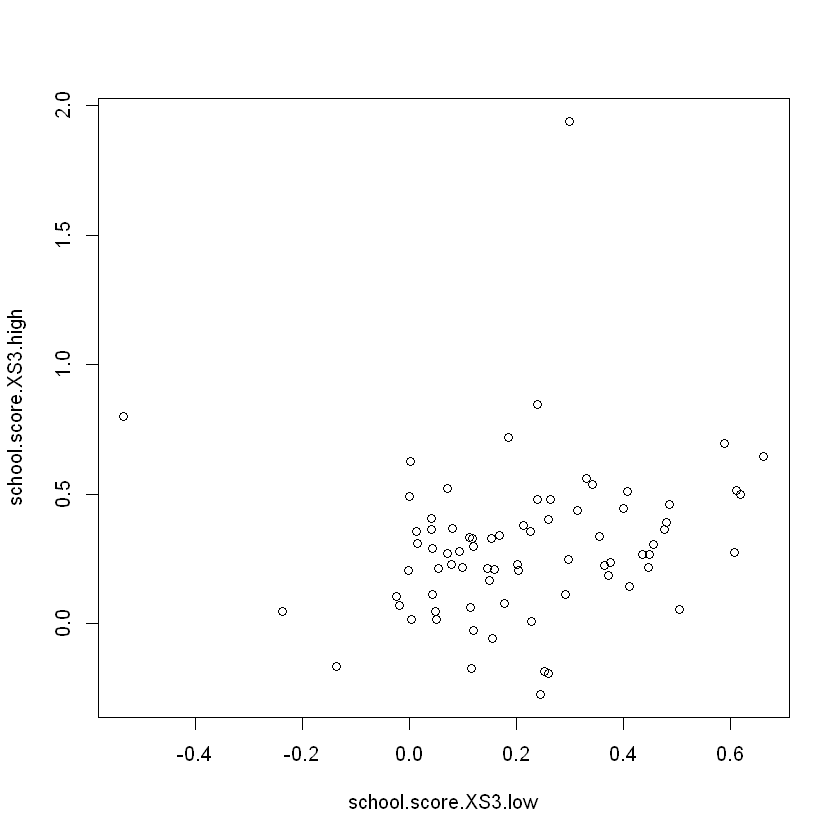

In [30]:
plot(school.score.XS3.low, school.score.XS3.high)
t.test(school.score.XS3.high - school.score.XS3.low)

In [31]:
#
# Look at school-wise heterogeneity
#

In [32]:
pdf("school_hist.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(school.score, xlab = "School Treatment Effect Estimate", main = "")
dev.off()

png 
  2

In [33]:
#
# Re-check ATE... sanity check only
#

In [34]:
ate.hat = mean(school.score)
se.hat = sqrt(var(school.score) / length(school.score - 1))
print(paste(round(ate.hat, 3), "+/-", round(1.96 * se.hat, 3)))

[1] "0.247 +/- 0.039"


In [35]:
#
# Look at variation in propensity scores
#

In [36]:
DF = X
DF$W.hat = cf$W.hat

In [37]:
pdf("pscore.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(W.hat ~ S3, data = DF, ylab = "Propensity Score", xlab = "Student Expectation of Success")
lines(smooth.spline(X$S3, cf$W.hat), lwd = 2, col = 4)
dev.off()

png 
  2

In [38]:
#
# Analysis ignoring clusters
#

In [39]:
cf.noclust = causal_forest(X[,selected.idx], Y, W,
                           Y.hat = Y.hat, W.hat = W.hat,
                           tune.parameters = "all")

In [40]:
ATE.noclust = average_treatment_effect(cf.noclust)
paste("95% CI for the ATE:", round(ATE.noclust[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noclust[2], 3))

[1] "95% CI for the ATE: 0.253 +/- 0.022"

In [41]:
test_calibration(cf.noclust)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value  Pr(>t)    
mean.forest.prediction         1.007542   0.044966 22.4068 < 2e-16 ***
differential.forest.prediction 0.509010   0.123142  4.1335 1.8e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


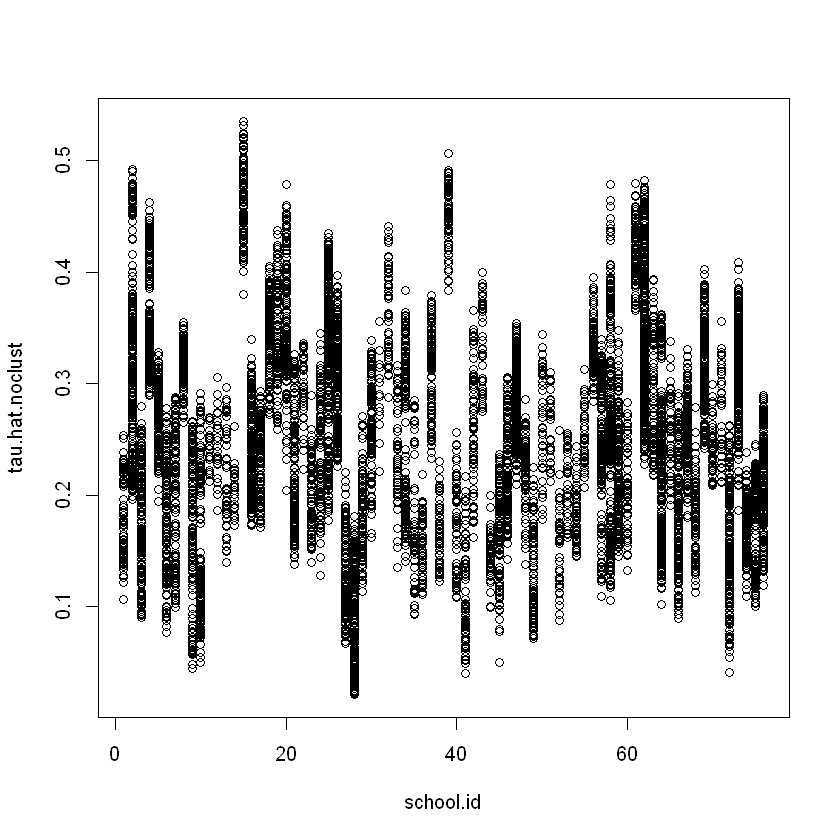

In [42]:
tau.hat.noclust = predict(cf.noclust)$predict
plot(school.id, tau.hat.noclust)

In [43]:
nfold = 5
school.levels = unique(school.id)
cluster.folds = sample.int(nfold, length(school.levels), replace = TRUE)

In [44]:
tau.hat.crossfold = rep(NA, length(Y))
for (foldid in 1:nfold) {
  print(foldid)
  infold = school.id %in% school.levels[cluster.folds == foldid]
  cf.fold = causal_forest(X[!infold, selected.idx], Y[!infold], W[!infold],
                          Y.hat = Y.hat[!infold], W.hat = W.hat[!infold],
                          tune.parameters = "all")
  pred.fold = predict(cf.fold, X[infold, selected.idx])$predictions
  tau.hat.crossfold[infold] = pred.fold
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [45]:
cf.noclust.cpy = cf.noclust
cf.noclust.cpy$predictions = tau.hat.crossfold
cf.noclust.cpy$clusters = school.id
test_calibration(cf.noclust.cpy)



Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value  Pr(>t)    
mean.forest.prediction         1.007637   0.065782  15.318 < 2e-16 ***
differential.forest.prediction 0.356911   0.229080   1.558 0.05963 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [46]:
Rloss = mean(((Y - Y.hat) - tau.hat * (W - W.hat))^2)
Rloss.noclust = mean(((Y - Y.hat) - tau.hat.noclust * (W - W.hat))^2)
Rloss.crossfold = mean(((Y - Y.hat) - tau.hat.crossfold * (W - W.hat))^2)

In [47]:
c(Rloss.noclust - Rloss, Rloss.crossfold - Rloss)

[1] 0.0001790978 0.0004119968

In [48]:
summary(aov(dr.score ~ factor(school.id)))

                     Df Sum Sq Mean Sq F value   Pr(>F)    
factor(school.id)    75    200   2.671   1.987 9.26e-07 ***
Residuals         10315  13868   1.344                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [49]:
#
# Analaysis without fitting the propensity score
#

In [50]:
cf.noprop = causal_forest(X[,selected.idx], Y, W,
                          Y.hat = Y.hat, W.hat = mean(W),
                          tune.parameters = "all",
                          equalize.cluster.weights = TRUE,
                          clusters = school.id)
tau.hat.noprop = predict(cf.noprop)$predictions

In [51]:
ATE.noprop = average_treatment_effect(cf.noprop)
paste("95% CI for the ATE:", round(ATE.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.noprop[2], 3))

[1] "95% CI for the ATE: 0.254 +/- 0.039"

In [52]:
pdf("tauhat_noprop.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(tau.hat, tau.hat.noprop,
     xlim = range(tau.hat, tau.hat.noprop),
     ylim = range(tau.hat, tau.hat.noprop),
     xlab = "orthogonalized causal forest estimates",
     ylab = "non-orthogonalized causal forest")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef
dev.off()

png 
  2

In [53]:
#
# Train forest on school-wise DR scores
#


In [54]:
school.X = (t(school.mat) %*% as.matrix(X[,c(4:8, 25:28)])) / school.size
school.X = data.frame(school.X)
colnames(school.X) = c("X1", "X2", "X3", "X4", "X5",
                    "XC.1", "XC.2", "XC.3", "XC.4")

In [55]:
dr.score = tau.hat + W / cf$W.hat * (Y - cf$Y.hat - (1 - cf$W.hat) * tau.hat) -
  (1 - W) / (1 - cf$W.hat) * (Y - cf$Y.hat + cf$W.hat * tau.hat)
school.score = t(school.mat) %*% dr.score / school.size

In [56]:
school.forest = regression_forest(school.X, school.score)
school.pred = predict(school.forest)$predictions
test_calibration(school.forest)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value Pr(>t)    
mean.forest.prediction         1.007121   0.082857 12.1550 <2e-16 ***
differential.forest.prediction 0.762137   0.659565  1.1555 0.1258    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [57]:
# Alternative OLS analysis
school.DF = data.frame(school.X, school.score=school.score)
coeftest(lm(school.score ~ ., data = school.DF), vcov = vcovHC)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.2430471  0.0771713  3.1494 0.002458 **
X1          -0.0496066  0.0291893 -1.6995 0.093938 . 
X2           0.0130727  0.0337298  0.3876 0.699580   
X3           0.0095648  0.0264768  0.3612 0.719066   
X4           0.0221643  0.0256032  0.8657 0.389799   
X5          -0.0345254  0.0268769 -1.2846 0.203431   
XC.1        -0.0024410  0.0930585 -0.0262 0.979153   
XC.2         0.0841394  0.1051694  0.8000 0.426560   
XC.3        -0.1343520  0.0878679 -1.5290 0.131038   
XC.4         0.0402797  0.0820446  0.4909 0.625091   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [58]:
#
# Make some plots...
#

In [59]:
pdf("tauhat_hist.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat, xlab = "estimated CATE", main = "")
dev.off()

png 
  2

In [60]:
pdf("tauhat_hist_noprop.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat.noprop, xlab = "estimated CATE", main = "")
dev.off()

png 
  2

In [61]:
pdf("tauhat_hist_noclust.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
hist(tau.hat.noclust, xlab = "estimated CATE", main = "",
     breaks = seq(-0.0, 0.55, by = 0.55 / 25))
dev.off()

png 
  2

In [62]:
pdf("tauhat_vs_X1.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X1), xlab = "X1", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X1"], tau.hat, df = 4), lwd = 2, col = 4)
dev.off()

png 
  2

In [63]:
pdf("tauhat_vs_X2.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat ~ round(X$X2), xlab = "X2", ylab = "estimated CATE")
lines(smooth.spline(4 + X[,"X2"], tau.hat, df = 4), lwd = 2, col = 4)
dev.off()

png 
  2

In [64]:
school.avg.tauhat = t(school.mat) %*% tau.hat / school.size

In [65]:
pdf("school_avg.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
plot(school.avg.tauhat, school.pred, cex = 1.5,
     xlim = range(school.avg.tauhat, school.pred),
     ylim = range(school.avg.tauhat, school.pred),
     xlab = "average CATE estimate in school",
     ylab = "school-wise forest predictions")
abline(0, 1, lwd = 2, lty = 2, col = 4)
par = pardef
dev.off()

png 
  2

In [66]:
#
# Experiment with no orthogonalization
#

In [67]:
n.synth = 1000
p.synth = 10
X.synth = matrix(rnorm(n.synth * p.synth), n.synth, p.synth)
W.synth = rbinom(n.synth, 1, 1 / (1 + exp(-X.synth[,1])))
Y.synth = 2 * rowMeans(X.synth[,1:6]) + rnorm(n.synth)

In [68]:
Y.forest.synth = regression_forest(X.synth, Y.synth)
Y.hat.synth = predict(Y.forest.synth)$predictions
W.forest.synth = regression_forest(X.synth, W.synth)
W.hat.synth = predict(W.forest.synth)$predictions

In [69]:
cf.synth = causal_forest(X.synth, Y.synth, W.synth,
                         Y.hat = Y.hat.synth, W.hat = W.hat.synth)
ATE.synth = average_treatment_effect(cf.synth)
paste("95% CI for the ATE:", round(ATE.synth[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth[2], 3))

[1] "95% CI for the ATE: -0.055 +/- 0.145"

In [70]:
cf.synth.noprop = causal_forest(X.synth, Y.synth, W.synth,
                                Y.hat = Y.hat.synth, W.hat = mean(W.synth))
ATE.synth.noprop = average_treatment_effect(cf.synth.noprop)
paste("95% CI for the ATE:", round(ATE.synth.noprop[1], 3),
      "+/-", round(qnorm(0.975) * ATE.synth.noprop[2], 3))

[1] "95% CI for the ATE: 0.055 +/- 0.143"

In [71]:
#
# Visualize school-level covariates by treatment heterogeneity
#

In [72]:
school.X.std = scale(school.X)
school.tercile = cut(school.pred,
                     breaks = c(-Inf, quantile(school.pred, c(1/3, 2/3)), Inf))
school.tercile.mat = model.matrix(~ school.tercile + 0)
school.means = diag(1 / colSums(school.tercile.mat)) %*% t(school.tercile.mat) %*% as.matrix(school.X.std)

In [73]:
MM = max(abs(school.means))
HC = heat.colors(21)
school.col = apply(school.means, 1:2, function(aa) HC[1 + round(20 * (0.5 + aa))])

In [74]:
DF.plot = data.frame(tercile=rep(factor(1:3, labels=c("low", "mid", "high")), 9), mean=as.numeric(school.means),
                     feature = factor(rbind(colnames(school.X), colnames(school.X), colnames(school.X))))

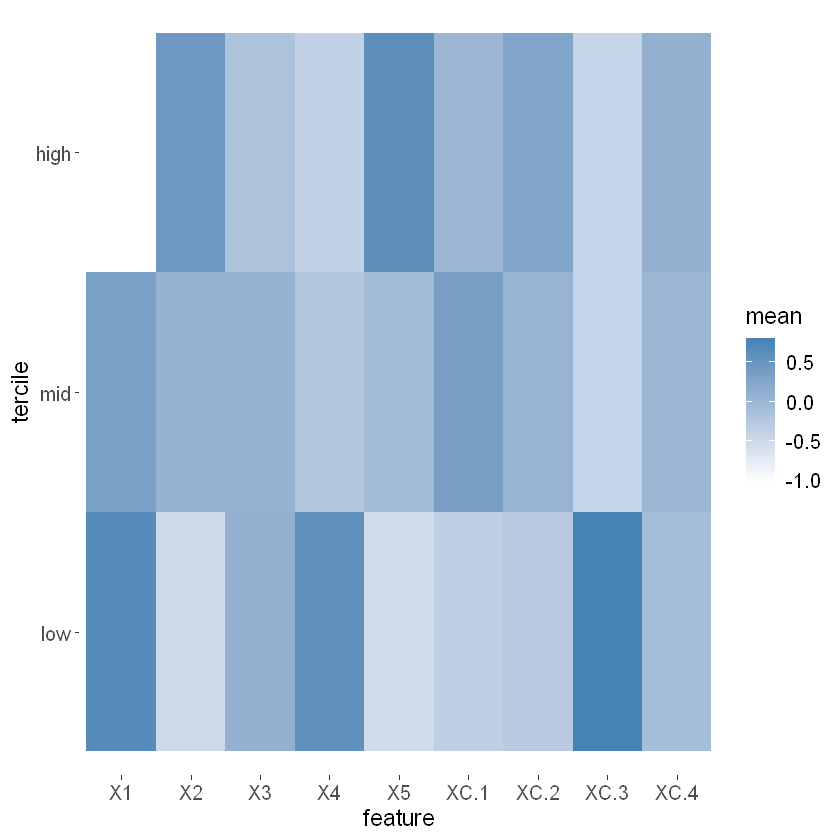

In [75]:
ggplot(data = DF.plot, aes(x = feature, y = tercile, fill = mean)) +
    geom_tile() + scale_fill_gradient(low = "white", high = "steelblue") +
    theme(axis.text = element_text(size=12), axis.title = element_text(size=14),
          legend.title = element_text(size=14), legend.text = element_text(size=12)) +
    theme(panel.background = element_blank())
ggsave("tercile_plot.pdf", width = 8, height = 4.5, dpi = 120)

In [76]:
mean(school.X$XC.3)
mean(school.X$XC.3[as.numeric(school.tercile) == 1])

[1] 0.2105263

[1] 0.5384615

In [77]:
#
# CATE by school
#

In [78]:
ord = order(order(school.pred))
school.sort = ord[school.id]

In [79]:
pdf("school_boxplot.pdf")
pardef = par(mar = c(5, 4, 4, 2) + 0.5, cex.lab=1.5, cex.axis=1.5, cex.main=1.5, cex.sub=1.5)
boxplot(tau.hat.noclust ~ school.sort, xaxt = "n",
        xlab = "school", ylab = "estimated CATE")
points(1:76, sort(school.pred), col = 4, pch = 16)
legend("topleft", c("school mean CATE", "CATE w/o clustering"), pch = c(16, 1), col = c(4, 1), cex = 1.5)
par = pardef
dev.off()

png 
  2